In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import fig_settings as fs

# Forecast Horizon Plotting

Visualizes the short-run predictive power of the reservoir for varying parameter values.

In [2]:
colors = ["#5f6366", "#3768d2", "#005b7a", "#a6cebd"]
fs.set_fonts()
idx2 = 1
idx3 = 2

#### Fig. 5: Forecast Horizon v $N$

In [3]:
with open("Data/FH_vs_size.json") as file:
    jsondata = json.loads(file.read())
    n = np.array(jsondata["params"], dtype=float)
    FH_OECT = np.array(jsondata["FH-OECT"], dtype=float)
    FH_tanh = np.array(jsondata["FH-tanh"], dtype=float)

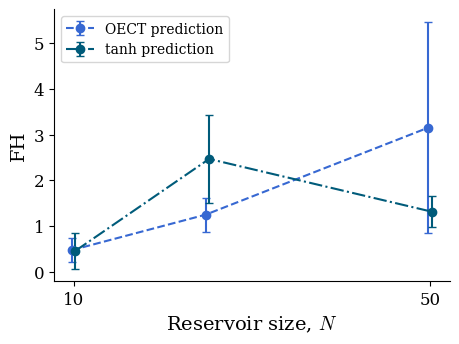

In [4]:
dodge = 0.005 * (max(n) - min(n))

plt.figure(figsize=(5.5, 4))
plt.errorbar(
    n - dodge,
    FH_OECT.mean(axis=1),
    yerr=FH_OECT.std(axis=1),
    fmt="--",
    marker="o",
    capsize=3,
    color=colors[idx2],
    label="OECT prediction",
)
plt.errorbar(
    n + dodge,
    FH_tanh.mean(axis=1),
    yerr=FH_tanh.std(axis=1),
    fmt="-.",
    marker="o",
    color=colors[idx3],
    capsize=3,
    label="tanh prediction",
)
# plt.plot(reservoir_dims, OECT_means, "--")
plt.xticks([10, 50], ["10", "50"])

plt.ylabel("FH")
plt.xlabel(r"Reservoir size, $N$")

plt.subplots_adjust(bottom=0.2, left=0.18)

sns.despine()
plt.legend()
plt.savefig("Figures/fig5.png", dpi=1000)
plt.savefig("Figures/fig5.pdf", dpi=1000)
plt.show()

#### Fig. 6: Forecast Horizon vs. the pinchoff voltage

In [5]:
with open("Data/FH_vs_pinchoff.json") as file:
    jsondata = json.loads(file.read())
    pinchoff = np.array(jsondata["params"], dtype=float)
    FH_OECT = np.array(jsondata["FH-OECT"], dtype=float)

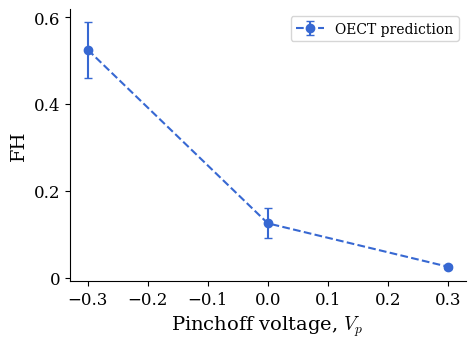

In [6]:
plt.figure(figsize=(5.5, 4))
plt.errorbar(
    pinchoff,
    FH_OECT.mean(axis=1),
    yerr=FH_OECT.std(axis=1),
    fmt="--",
    marker="o",
    capsize=3,
    color=colors[idx2],
    label="OECT prediction",
)
plt.yticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
plt.ylabel("FH")
plt.xlabel(r"Pinchoff voltage, $V_p$")

plt.subplots_adjust(bottom=0.2, left=0.18)

sns.despine()
plt.legend()
plt.savefig("Figures/fig6.png", dpi=1000)
plt.savefig("Figures/fig6.pdf", dpi=1000)
plt.show()

#### Fig. 7: Forecast Horizon vs. the connection probability

In [7]:
with open("Data/FH_vs_p.json") as file:
    jsondata = json.loads(file.read())
    p = np.array(jsondata["params"], dtype=float)
    FH_OECT = np.array(jsondata["FH-OECT"], dtype=float)
    FH_tanh = np.array(jsondata["FH-tanh"], dtype=float)

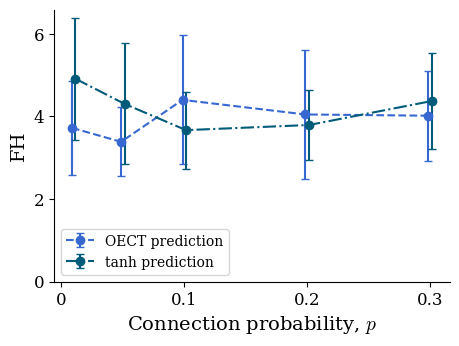

In [8]:
dodge = 0.005 * (max(p) - min(p))

plt.figure(figsize=(5.5, 4))
plt.errorbar(
    p[1:] - dodge,
    FH_OECT[1:].mean(axis=1),
    yerr=FH_OECT[1:].std(axis=1),
    fmt="--",
    marker="o",
    color=colors[idx2],
    capsize=3,
    label="OECT prediction",
)
plt.errorbar(
    p[1:] + dodge,
    FH_tanh[1:].mean(axis=1),
    yerr=FH_tanh[1:].std(axis=1),
    fmt="-.",
    marker="o",
    color=colors[idx3],
    capsize=3,
    label="tanh prediction",
)
plt.xticks([0, 0.1, 0.2, 0.3], [0, 0.1, 0.2, 0.3])
plt.yticks([0, 2, 4, 6], [0, 2, 4, 6])
plt.ylabel("FH")
plt.xlabel(r"Connection probability, $p$")

plt.subplots_adjust(bottom=0.2, left=0.18)

sns.despine()
plt.legend()
plt.savefig("Figures/fig7.png", dpi=1000)
plt.savefig("Figures/fig7.pdf", dpi=1000)
plt.show()

#### Fig. S1: Forecast Horizon vs. $\alpha$

In [9]:
with open("Data/FH_vs_alpha.json") as file:
    jsondata = json.loads(file.read())
    alpha = np.array(jsondata["params"], dtype=float)
    FH_OECT = np.array(jsondata["FH-OECT"], dtype=float)
    FH_tanh = np.array(jsondata["FH-tanh"], dtype=float)

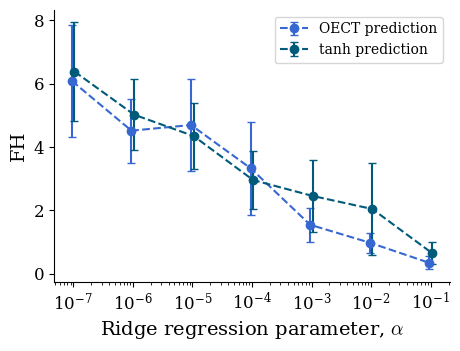

In [10]:
dodge = 0.5 * (max(alpha) - min(alpha))

plt.figure(figsize=(5.5, 4))
plt.errorbar(
    alpha * (1 - dodge),
    FH_OECT.mean(axis=1),
    yerr=FH_OECT.std(axis=1),
    fmt="--",
    marker="o",
    color=colors[idx2],
    capsize=3,
    label="OECT prediction",
)
plt.errorbar(
    alpha * (1 + dodge),
    FH_tanh.mean(axis=1),
    yerr=FH_tanh.std(axis=1),
    fmt="--",
    marker="o",
    color=colors[idx3],
    capsize=3,
    label="tanh prediction",
)
plt.ylabel("FH")
plt.xlabel(r"Ridge regression parameter, $\alpha$")
plt.xscale("log")

plt.yticks([0, 2, 4, 6, 8], [0, 2, 4, 6, 8])

plt.subplots_adjust(bottom=0.2, left=0.18)

sns.despine()
plt.legend()
plt.savefig("Figures/figs1.png", dpi=1000)
plt.savefig("Figures/figs1.pdf", dpi=1000)
plt.show()